In this exploratory notebook, 
1. I expriment with different visualization options 
2. and try to determine feature ranking in terms of accuracy in identifying the target 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import imagecodecs

import skimage as sk

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [25]:
# def makeFig(df):
#     fig3, ax3 = plt.subplots(3,3)
#     for n, ax in enumerate(ax3.flatten()):
#             ax.set_title(str(df.columns[n + 3]))
# #             ax.df.iloc[:, 11: 11+ncols].hist(bins=6, layout = (1, ncols))
#             sns.swarmplot(data=df, x=df.columns[n + 3], y="AN_Tx", hue="day")
#             ax.set_axis_off()


In [114]:
from pathlib import Path
from skimage import io
def get_images_array(data):
    ''' function to store images. 
    Input: image indices as array of int types
    Output: numpy array containing images as np.float64 type'''
    
    # create empty list
    image_list = []
    for i in data.index:
         
        
        img = io.imread('binaryImagesOldMLI/resize/{}.tif'.format(i)).astype(np.float64)
        # append to list of all images
        image_list.append(img)

    # convert image list to single array
    X = np.array(image_list)
    return(X)

In [113]:
df2 = df.drop(index = [42,43])
images = get_images_array(df2)

In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

#take in the image set and the labels for each image as input, and return a list of ranked features.

def rank_features(images, labels):

    #Create a SelectKBest object to select the top k features
    selector = SelectKBest(mutual_info_classif, k=len(images[0]))

    #Fit the selector to the image set and labels
    selector.fit(images, labels)

    #Get the feature scores and sort them in descending order
    scores = selector.scores_
    sorted_scores = sorted(scores, reverse=True)

    #Create a list of tuples containing each feature's score and its index
    feature_scores = [(score, index) for index, score in enumerate(scores)]

    #Sort the list by score in descending order
    sorted_feature_scores = sorted(feature_scores, key=lambda x: x[0], reverse=True)

    #Extract the feature indices from the sorted list
    ranked_features = [[index,score] for score, index in sorted_feature_scores]

    return ranked_features




In [123]:
ranked_features = rank_features(X,  df["AN_Tx"].values)

print(ranked_features)

[[7, 0.6932408853044011], [0, 0.13839180606220047], [4, 0.13238452952001012], [2, 0.10672965708857518], [6, 0.09166977320137426], [3, 0.09031682989351975], [5, 0.06783795906918444], [1, 0.04822518457596736]]


> double check the data for correctness in labels and lumen count

Load Images and Image Data

In [2]:
# load lung image tissue data using pandas
df = pd.read_excel("image_data_complete_oldMLI.xlsx",index_col = 0)

# Make categorical columns categorical
df['day'] = pd.Categorical(df.day)
df = df.rename(columns={"AN Tx": "AN_Tx"})
df['AN_Tx'] = pd.Categorical(df.AN_Tx)
df['Ventilation'] = pd.Categorical(df.Ventilation)
df['slide'] = pd.Categorical(df.slide)
df['subslide'] = pd.Categorical(df.subslide)

# check for NA, double check the data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 633
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   day                    424 non-null    category
 1   slide                  424 non-null    category
 2   subslide               424 non-null    category
 3   tissue area fraction   424 non-null    float64 
 4   length of tissue (px)  424 non-null    int64   
 5   width of tissue (px)   424 non-null    float64 
 6   number_of_lumens       424 non-null    int64   
 7   R_equiv                424 non-null    float64 
 8   Rmidpoint              424 non-null    float64 
 9   T_tilde                424 non-null    float64 
 10  area of tissue (px^2)  424 non-null    float64 
 11  area of tissue se2     424 non-null    float64 
 12  area of tissue se3     424 non-null    float64 
 13  area of tissue se4     424 non-null    float64 
 14  area of tissue se5     424 non-null    flo

In [3]:
tags_df = pd.read_excel("Archive/tissue_im_test.xlsx", sheet_name = "MLI_old")


In [31]:
! ls binaryImagesOldMLI/resize 

ls: illegal option -- 3
usage: ls [-@ABCFGHLOPRSTUWabcdefghiklmnopqrstuwx1%] [file ...]


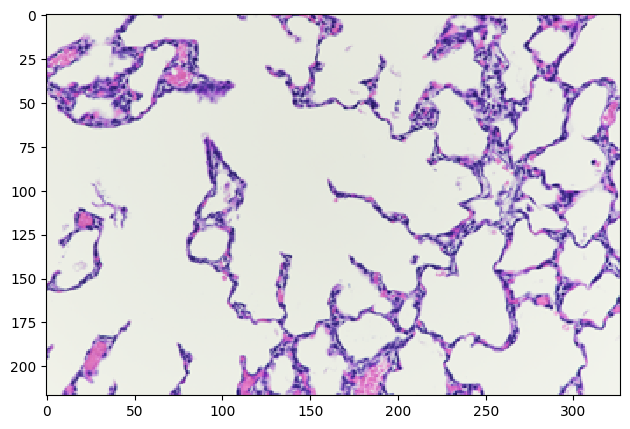

In [4]:
indx_test = np.random.randint(232)
print(indx_test)
print(df.iloc[indx_test,:])
print(tags_df[tags_df["Slide #"] == df.iloc[indx_test,:].slide])

44
day                               0
slide                             5
subslide                          7
tissue area fraction       0.437347
length of tissue (px)         51588
width of tissue (px)     135.810208
number_of_lumens                 67
R_equiv                  149.901924
Rmidpoint                348.012148
T_tilde                    1.402741
area of tissue (px^2)    7010011.75
area of tissue se2        5380402.0
area of tissue se3       3110470.75
area of tissue se4        1763795.5
area of tissue se5        846083.75
area of tissue se6        331639.75
area of tissue se7              0.0
area of tissue se8              0.0
area of tissue se9              0.0
area of tissue se10             0.0
AN_Tx                           SAL
Ventilation                    SAFE
MLI                       21.580577
MLI_edit pics             21.516548
Name: 58, dtype: object
    Animal Number Age AN Tx Ventilation  Slide #        MLI  MLI_edit pics
4             309  D0   SAL       

In [ ]:
# check the image to double check the number of lumens 
import skimage as sk

test_img = sk.io.imread("/Users/tfai/Documents/GitHub/Minimal-Lung-Model/Image_Analysis/binaryImagesOldMLI/resize/{}.tif"
          .format((df.iloc[indx_test,:].slide-1)*13+(df.iloc[indx_test,:].subslide-1)));
sk.io.imshow(test_img)


It would be nice to mask the image with colors segmenting lumens and to number the lumens with visible tags on the image


In the last meeting, we realized that Rmidpoint had some suspicious values. Let's check it again:


In [12]:
df.describe()

,tissue area fraction,length of tissue (px),width of tissue (px),number_of_lumens,R_equiv,Rmidpoint,T_tilde,area of tissue (px^2),area of tissue se2,area of tissue se3,...,area of tissue se8,area of tissue se9,area of tissue se10,MLI,MLI_edit pics,length,width,R_um,Rmid_um,area
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,4.240000e+02,4.240000e+02,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.422096,54711.452830,124.276913,75.827830,141.603995,398.498404,1.412080,6.765939e+06,4.748526e+06,2.410571e+06,...,17057.234080,9574.477300,5209.788031,25.007214,25.345758,8045.801887,18.276017,20.824117,58.602707,146322.200861
std,0.066541,8448.493858,12.727692,21.129927,28.824289,122.947393,0.270064,1.066206e+06,1.341981e+06,1.140563e+06,...,74170.266332,62633.724918,49196.213100,6.633729,6.907500,1242.425567,1.871719,4.238866,18.080499,23058.081594
min,0.238197,28573.000000,92.156287,28.000000,71.621172,195.805488,0.645283,3.818257e+06,2.157830e+06,5.598081e+05,...,0.000000,0.000000,0.000000,14.206968,14.461426,4201.911765,13.552395,10.532525,28.794925,82574.770221
25%,0.379691,48888.000000,116.852817,60.000000,119.535708,313.652213,1.244004,6.087411e+06,3.848224e+06,1.686670e+06,...,0.000000,0.000000,0.000000,19.171671,19.649391,7189.411765,17.184238,17.578781,46.125325,131648.153655
50%,0.417225,54333.500000,123.003838,74.500000,137.132450,373.523340,1.381695,6.687853e+06,4.581483e+06,2.136026e+06,...,0.000000,0.000000,0.000000,22.661890,23.727401,7990.220588,18.088800,20.166537,54.929903,144633.493728
75%,0.455474,61420.500000,130.862472,91.250000,160.110062,452.819323,1.509962,7.300969e+06,5.371849e+06,2.858181e+06,...,0.000000,0.000000,0.000000,29.754533,29.769304,9032.426471,19.244481,23.545597,66.591077,157892.930228
max,0.688697,84453.000000,170.373591,167.000000,229.958459,1162.707130,2.779904,1.103732e+07,9.649097e+06,7.246100e+06,...,785551.500000,761941.750000,657741.000000,39.802445,39.789910,12419.558824,25.054940,33.817420,170.986343,238696.464100


R_midpoint needs to be calculated again since R_equiv is the only quanitity in SI units and all other quantities used in calculating R_midpoint were in pixels

## Rmidpoint tests
After fixing the R_equiv units by converting them to pixels, I calculated R_midpoint for all images. I also processed 2 additional images that were missing from the set. 

The values of Rmidpoint have definitely 'improved', but they still show a suspiciously large std of the same order of magnitude as the mean and 1 order of magnitude greater than R_equiv!

Update 12/12/22: I caught another error in R_equiv.m that calculates Rmidpoint from R_equiv values. The area array had to be sorted for this calculation and in the original script, that was not the case. So I added a line that sorts the areas and now, we no longer see values less than 200 but see 3 outliers. 

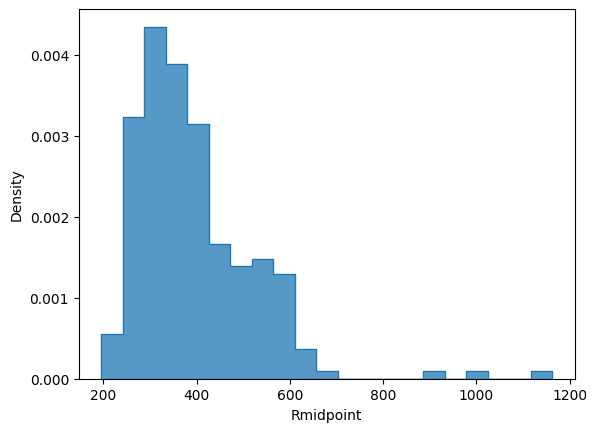

In [3]:
sns.histplot(
    df, x="Rmidpoint", element="step",
    stat="density", common_norm=False,
)

Rmidpoint_sus = df[df["Rmidpoint"] > 800 ] # taking a closer look at the 3 outliers

In [4]:
print(Rmidpoint_sus)


     day slide subslide  tissue area fraction  length of tissue (px)  \
indx                                                                   
28     0     3        3              0.324815                  36761   
93     0     8        3              0.326484                  38316   
95     0     8        5              0.295362                  34498   

      width of tissue (px)  number_of_lumens     R_equiv    Rmidpoint  \
indx                                                                    
28              141.547918                35  168.873538  1162.707130   
93              136.501305                39  190.786211   901.357267   
95              137.156125                28  200.392039  1000.694207   

       T_tilde  ...  area of tissue se5  area of tissue se6  \
indx            ...                                           
28    1.136264  ...          389805.250               0.000   
93    1.110564  ...          539388.375          445776.375   
95    1.198558  ...  

In [5]:
area_se10 = df[df["area of tissue se10"] > 0 ] # taking a closer look at the 3 outliers

In [6]:
print(area_se10)

     day slide subslide  tissue area fraction  length of tissue (px)  \
indx                                                                   
159    0    13        4               0.43443                  53647   
286    0    23        1               0.48207                  53494   

      width of tissue (px)  number_of_lumens     R_equiv   Rmidpoint  \
indx                                                                   
159             129.726602                69  125.947014  355.942375   
286             144.364396                73  124.275085  547.222016   

       T_tilde  ...  area of tissue se5  area of tissue se6  \
indx            ...                                           
159   1.465382  ...           1180818.0          986553.000   
286   1.503876  ...           1297054.5          767622.375   

      area of tissue se7  area of tissue se8  area of tissue se9  \
indx                                                               
159           608260.000         

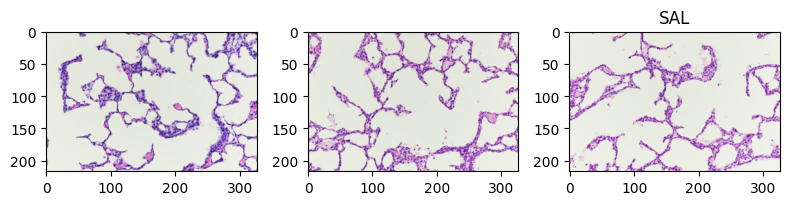

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

for i in range(3):
    test_img = sk.io.imread("/Users/tfai/Documents/GitHub/Minimal-Lung-Model/Image_Analysis/binaryImagesOldMLI/resize/{}.tif"
              .format(Rmidpoint_sus.iloc[i:i+1,:].index.values[0]));
    ax[i].imshow(test_img)
    plt.title(str(Rmidpoint_sus.iloc[i,20]))
#     sk.io.imshow(test_img)
    
fig.tight_layout()
plt.show()

In [60]:
# sns.histplot(
#     df, x="R_equiv", element="step",
#     stat="density", common_norm=False,
# )

# df.hist(column="MLI")
# df.hist(column="R_equiv")
# df.hist(column="Rmidpoint")

In [7]:
from fitter import Fitter, get_common_distributions, get_distributions

In [36]:
df["length"] = df["length of tissue (px)"]/6.8
df["width"] = df["width of tissue (px)"]/6.8
df["R_um"] = df["R_equiv"]/6.8
df["Rmid_um"] = df["Rmidpoint"]/6.8
df["area"] = df["area of tissue (px^2)"]/(6.8*6.8)


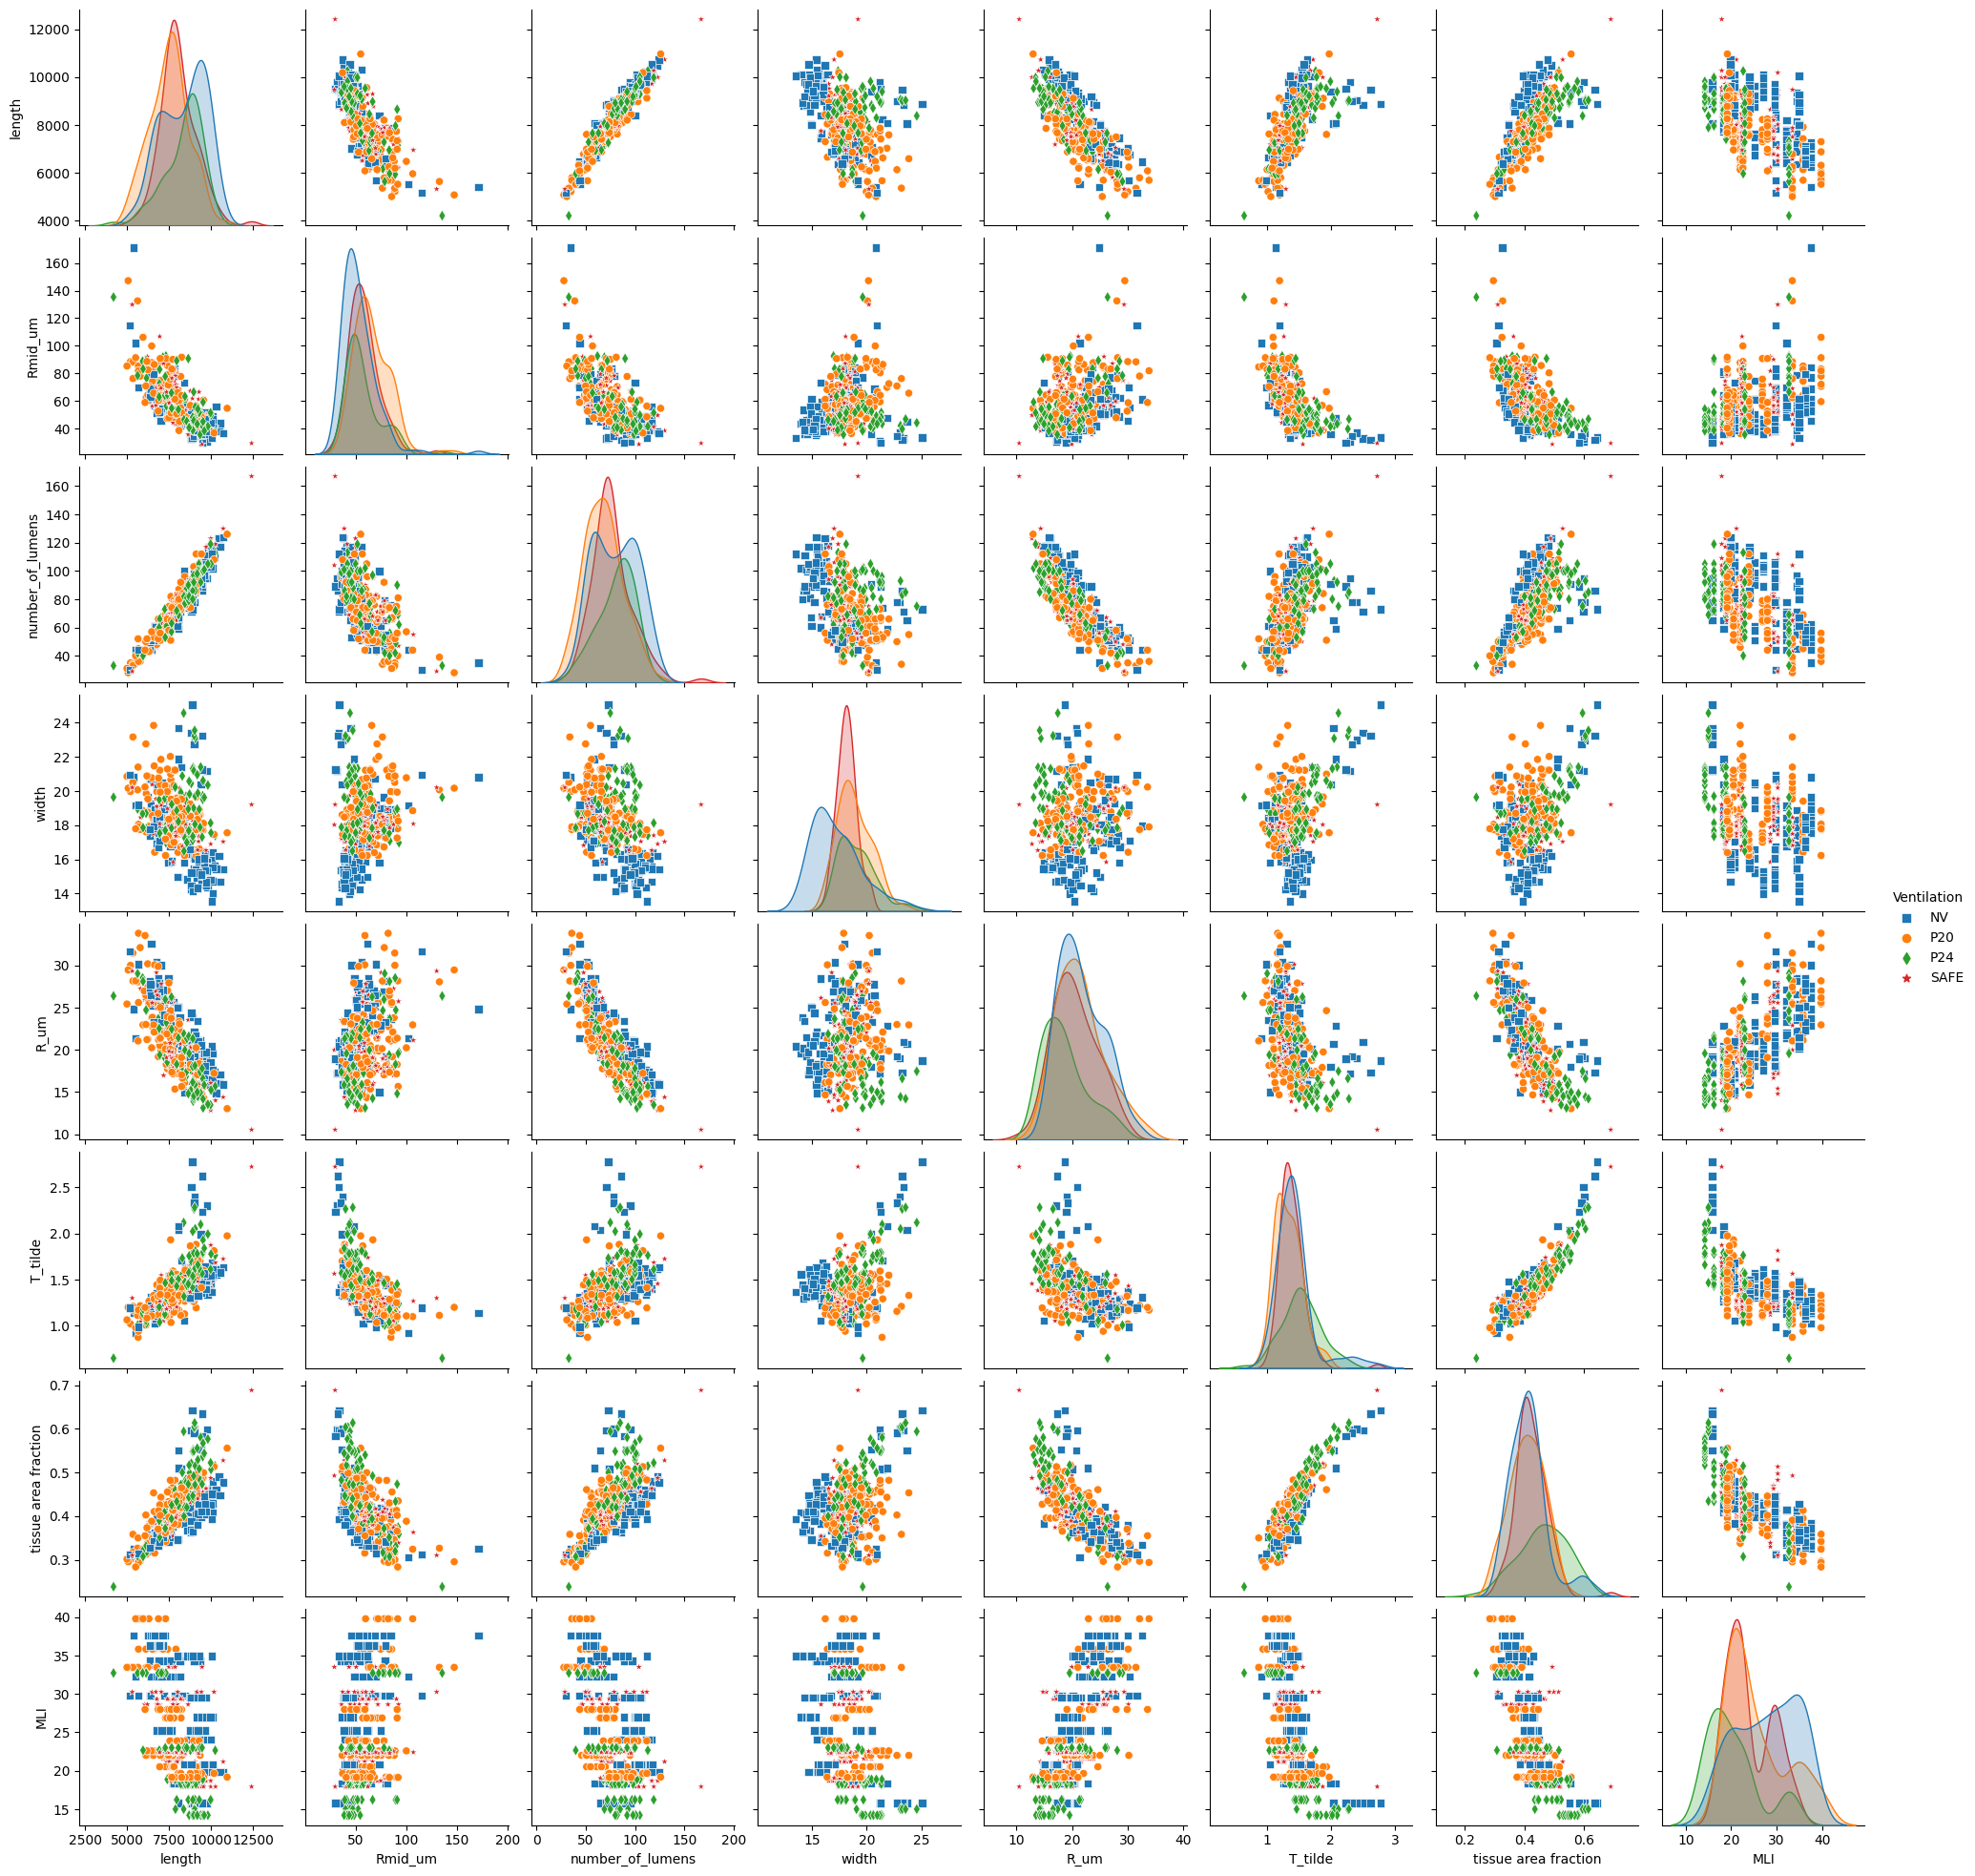

In [11]:
sns.pairplot(df, x_vars = ["length","Rmid_um","number_of_lumens", "width", "R_um","T_tilde","tissue area fraction", "MLI"],
             y_vars = ["length","Rmid_um","number_of_lumens", "width", "R_um","T_tilde","tissue area fraction", "MLI"],
             hue = "Ventilation", markers = ["s","o","d","*"])

Let's make a histogram of areas left after erosion by structuring elements of radius 2,3, and 4 um

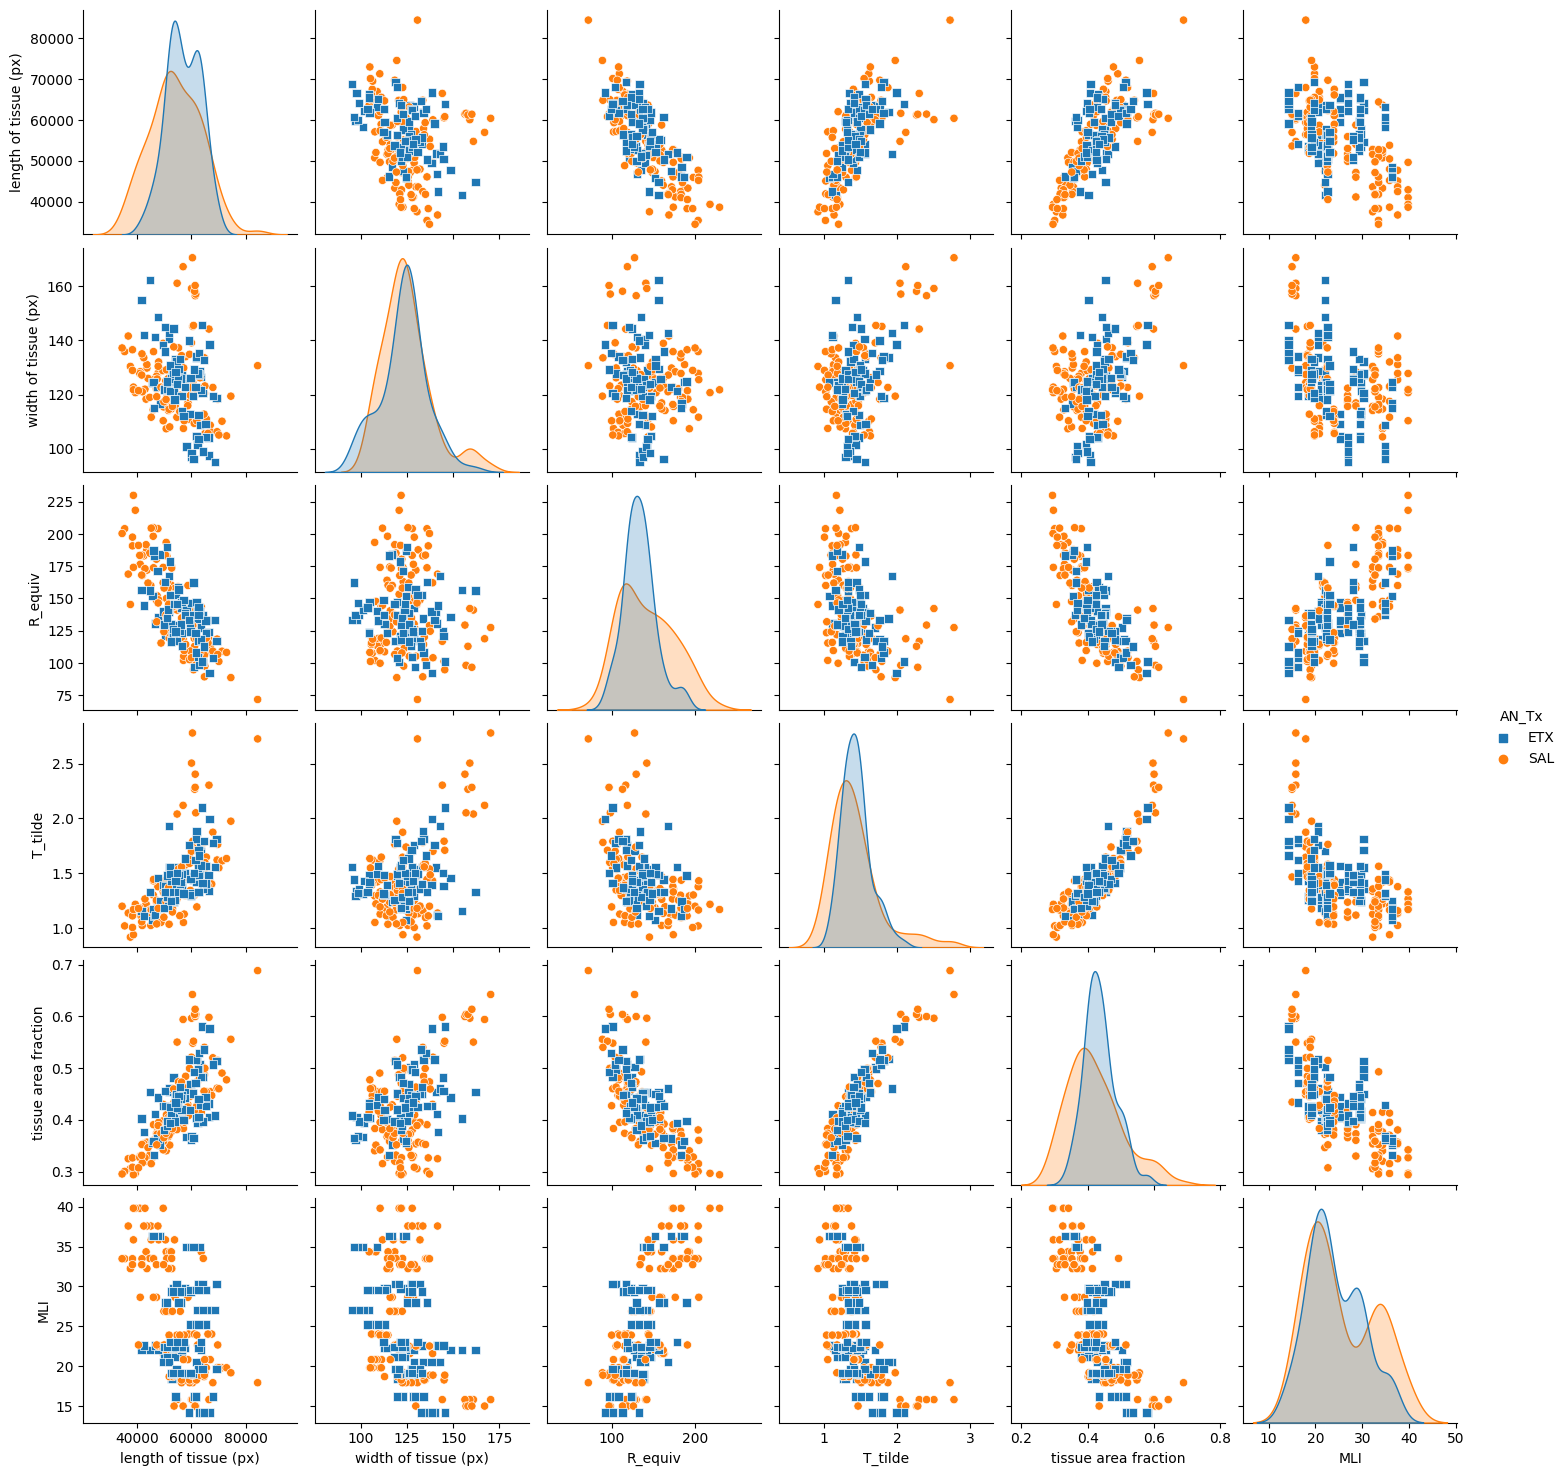

In [64]:
sns.pairplot(df, x_vars = ["length of tissue (px)", "width of tissue (px)", "R_equiv","T_tilde","tissue area fraction", "MLI"],
             y_vars = ["length of tissue (px)", "width of tissue (px)", "R_equiv","T_tilde","tissue area fraction", "MLI"],
             hue = "AN_Tx", markers = ["s","o"])

In [65]:
df[["length of tissue (px)", "width of tissue (px)", "R_equiv","T_tilde","tissue area fraction", "MLI"]].corr()

,length of tissue (px),width of tissue (px),R_equiv,T_tilde,tissue area fraction,MLI
length of tissue (px),1.000000,-0.268189,-0.745780,0.645896,0.742109,-0.489221
width of tissue (px),-0.268189,1.000000,-0.054755,0.412362,0.441218,-0.345139
R_equiv,-0.745780,-0.054755,1.000000,-0.451001,-0.729652,0.679650
T_tilde,0.645896,0.412362,-0.451001,1.000000,0.896861,-0.539046
tissue area fraction,0.742109,0.441218,-0.729652,0.896861,1.000000,-0.693653
MLI,-0.489221,-0.345139,0.679650,-0.539046,-0.693653,1.000000


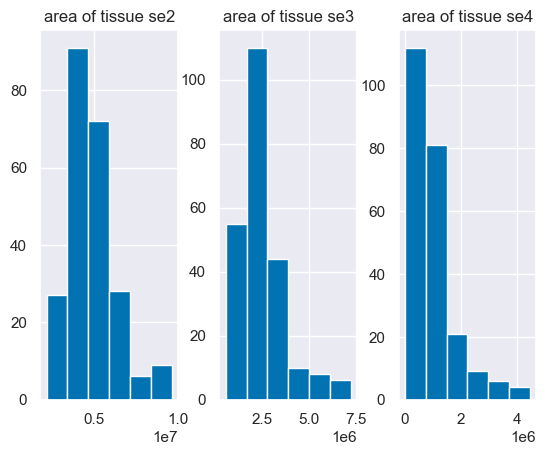

In [27]:
# fig, axes = plt.subplots(ncols=2,nrows=1)

# for n, ax in enumerate(axes.flat):
# for n in range(1,6): 
ncols = 3
hist = df.iloc[:, 11: 11+ncols].hist(bins=6, layout = (1, ncols))
    
    
plt.show()

Separating by day, we see that the day 7 has thinner tissue and we will have more images with zero tissue area left when the structuring element has radius 5 um.

<AxesSubplot: xlabel='area of tissue se5', ylabel='Density'>

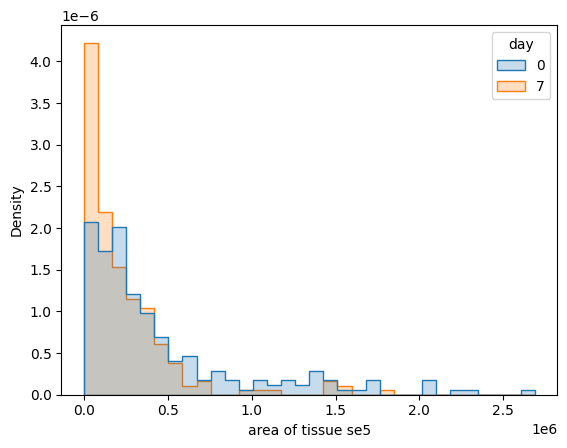

In [13]:
sns.histplot(
    df, x="area of tissue se5", hue="day", element="step",
    stat="density", common_norm=False,
)

# se5 is when the number of zeros in day 7 suddenly surpasses day 0

The swarm plots are also be helpful in showing categorical data:

[Text(37.972222222222214, 0.5, '')]

/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 8.0% of the points cannot be placed;

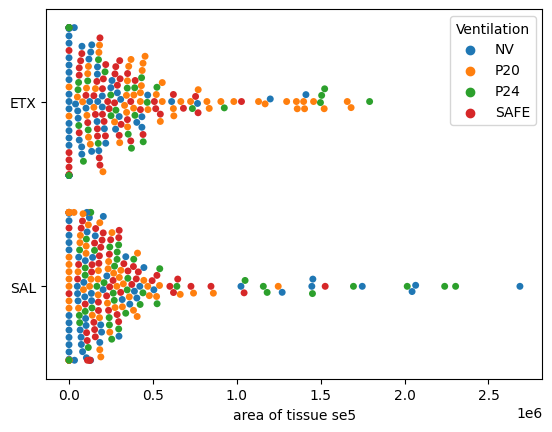

In [14]:
ax = sns.swarmplot(data=df, x="area of tissue se5", y="AN_Tx", hue="Ventilation")
ax.set(ylabel="")

[Text(31.75, 0.5, '')]

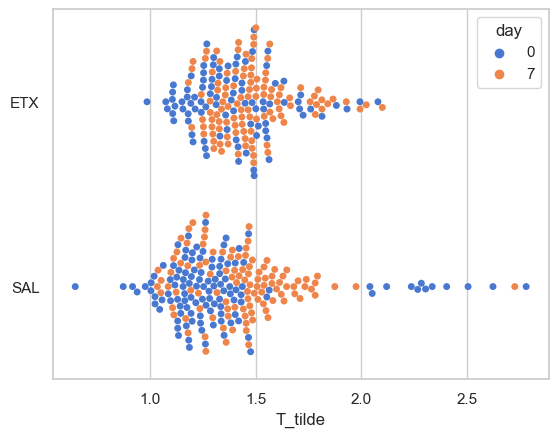

In [15]:
# Draw a categorical scatterplot to show each observation
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.swarmplot(data=df, x="T_tilde", y="AN_Tx", hue="day")
ax.set(ylabel="")

[Text(31.75, 0.5, '')]

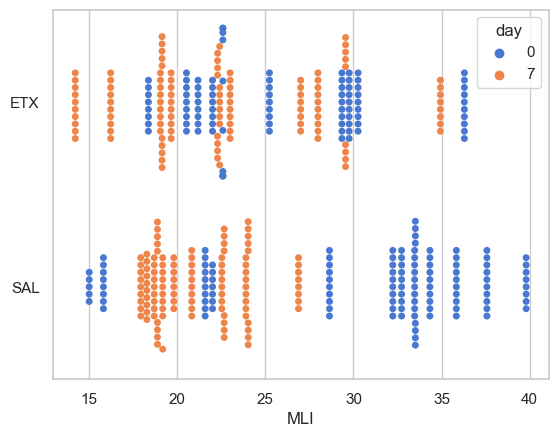

In [16]:
ax = sns.swarmplot(data=df, x="MLI", y="AN_Tx", hue="day")
ax.set(ylabel="")

[Text(31.75, 0.5, '')]

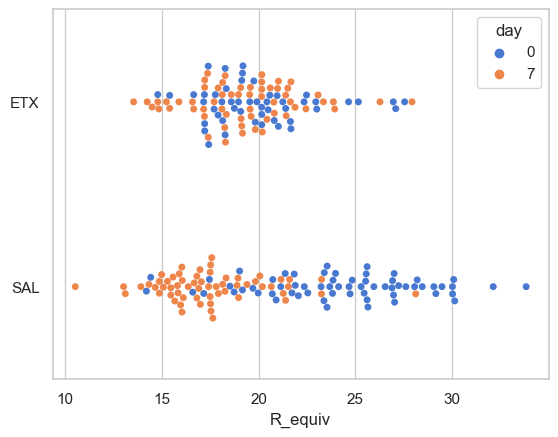

In [53]:
ax = sns.swarmplot(data=df, x="R_equiv", y="AN_Tx", hue="day")
ax.set(ylabel="")

[Text(31.75, 0.5, '')]

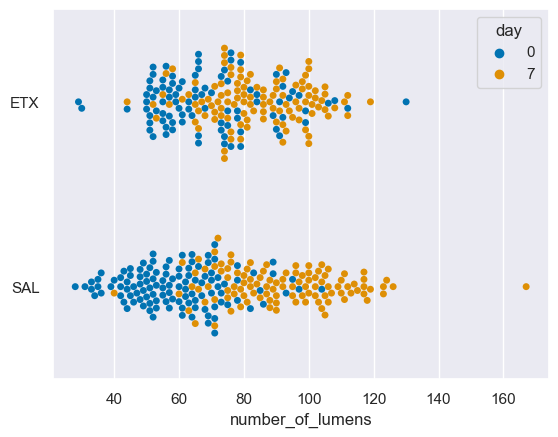

In [17]:
sns.set_theme(palette = 'colorblind')
ax = sns.swarmplot(data=df, x="number_of_lumens", y="AN_Tx", hue="day")
ax.set(ylabel="")

[Text(31.75, 0.5, '')]

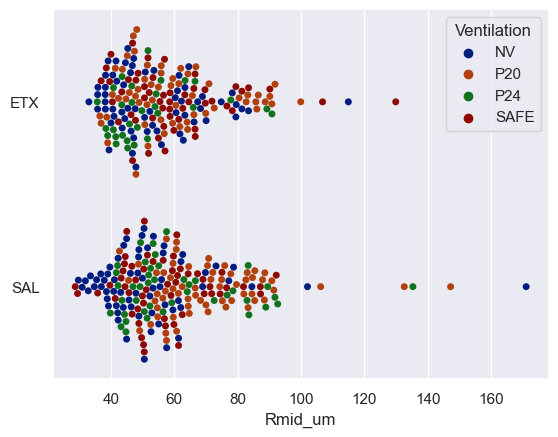

In [19]:
sns.set_theme(palette = 'dark')
ax = sns.swarmplot(data=df, x="Rmid_um", y="AN_Tx", hue="Ventilation")
ax.set(ylabel="")

# Feature Importance
Let's switch gears here and try to extract the most important features. To do this, we would need a predictive model, and for our chosen model, we score each feature based on how accurately it predicts the target.

Since we are interested in categorical target data,e.g., treatment or control, we use a classification model instead of regression.

First, we split the data into train and test. I would like to have an evaluation split in the future, but for now let's keep it experimental and simple. 

In [31]:
# assign the treatment label values to y
y = df["AN_Tx"].values

# X = df[["T_tilde", "R_equiv", "MLI", "area of tissue se5"]].values
# choose columns ['tissue area fraction', 'length of tissue (px)', 'width of tissue (px)',
#        'number_of_lumens', 'R_equiv', 'Rmidpoint','T_tilde', 'MLI', 'MLI_edit pics']
X = pd.concat([df.iloc[:,3:10], df.iloc[:,23:24]], axis = 1).values
X = pd.concat([df.iloc[:,3:4],df.iloc[:,6:7], df.iloc[:,23:28]], axis = 1).values
print(X.shape)
cols = np.array(pd.concat([df.iloc[:,3:10], df.iloc[:,23:26]], axis = 1).columns)
cols = np.array(pd.concat([df.iloc[:,3:4],df.iloc[:,6:7], df.iloc[:,23:28]], axis = 1).columns)
print(cols)

(424, 7)
['tissue area fraction' 'number_of_lumens' 'MLI_edit pics' 'length'
 'width' 'R_um' 'Rmid_um']


In [32]:
ss = StandardScaler()

dtree = DecisionTreeClassifier()

# split out evaluation sets (x_eval and y_eval)
# x_interim, x_eval, y_interim, y_eval = train_test_split(X,
#                                            y,
#                                            test_size=0.2,
#                                            random_state=52)

# split remaining data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                           random_state=52)

# examine number of samples in train, test, and validation sets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# print(x_eval.shape[0], 'eval samples')

x_train shape: (254, 7)
254 train samples
170 test samples


In [29]:
X_transform = ss.fit_transform(x_train)
X_train_transform = ss.fit_transform(x_train)



In [30]:
print(X_transform)

[[-1.03101024 -1.12901376  0.98030834 ...  0.4326655   1.05523272
   0.19221459]
 [-1.75401726 -1.50807094  0.98030834 ...  0.478995    0.12951162
   2.40485477]
 [-0.12079357 -0.22875296  0.98030834 ...  0.09630382  0.60299392
  -0.44354296]
 ...
 [ 1.83644767  1.19271146 -1.57758811 ...  0.72450775 -1.17674877
  -1.11490821]
 [ 1.91410488  0.76627213 -1.57758811 ...  1.55789821 -1.48483519
  -0.70364091]
 [ 2.01206255  1.05056502 -1.57758811 ...  1.43541867 -1.37892094
  -0.83858712]]


Feature: tissue area fraction Score: 0.08252
Feature: number_of_lumens Score: 0.03999
Feature: MLI_edit pics Score: 0.51690
Feature: length Score: 0.02798
Feature: width Score: 0.14952
Feature: R_um Score: 0.12165
Feature: Rmid_um Score: 0.06144


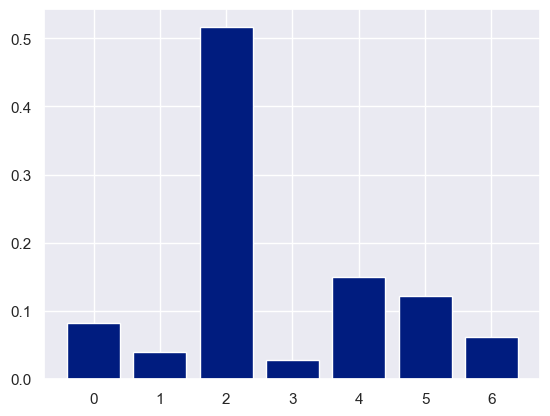

In [33]:
dtree.fit(X,y)
feature_importance = dtree.feature_importances_

# summarize feature importance
for i,v in enumerate(feature_importance):
    print('Feature: %s Score: %.5f' % (cols[i],v))
# plot feature importance
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

f2 = feature_importance




(233, 2)
Feature: 0, Score: 0.44075
Feature: 1, Score: 0.55925


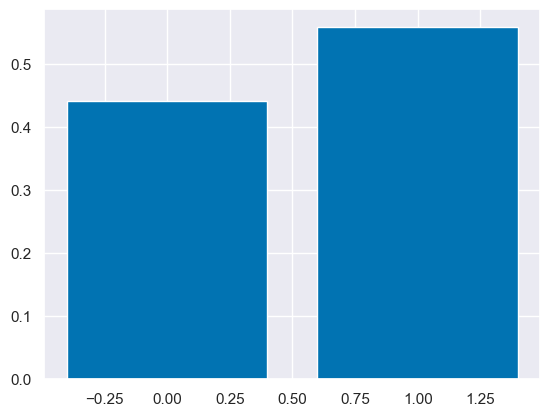

In [76]:
X = df.iloc[:,23:25].values
print(X.shape)
dtree.fit(X,y)
feature_importance = dtree.feature_importances_

# summarize feature importance
for i,v in enumerate(feature_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

In [77]:
# model.fit(
#     x_train,
#     y_train,
#     validation_data=(x_test, y_test)
# )

Well, that was kind of disappointing..but very interesting. So MLI_edit performs more than x2 better than MLI. Now, let's try a forest classifier instead:

Feature: 0, Score: 0.15054
Feature: 1, Score: 0.10748
Feature: 2, Score: 0.23875
Feature: 3, Score: 0.10289
Feature: 4, Score: 0.17377
Feature: 5, Score: 0.11786
Feature: 6, Score: 0.10872


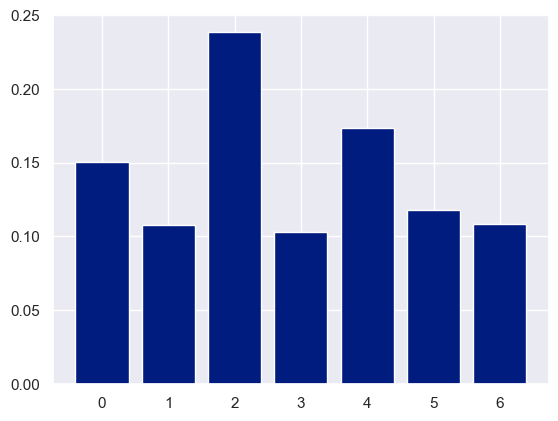

In [34]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()

rforest.fit(X,y)

ft_importance = rforest.feature_importances_
# summarize feature importance
for i,v in enumerate(ft_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(ft_importance))], ft_importance)
plt.show()

Okay, this seems more reasonable. MLI_edit only performs slightly better than MLI. Let's try the rest of the measures:

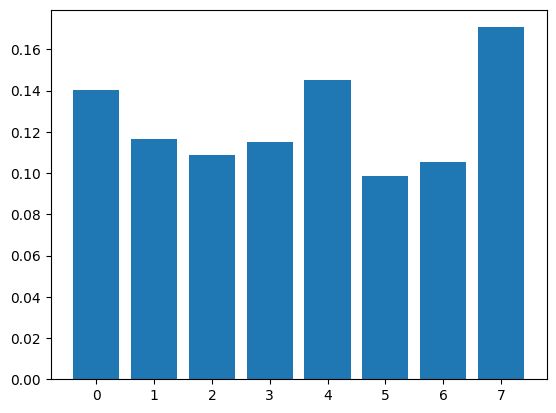

In [83]:
X = pd.concat([df.iloc[:,3:10], df.iloc[:,23:25]], axis = 1).values
rforest.fit(X,y)

ft_importance = rforest.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(ft_importance))], ft_importance)
plt.show()


In [ ]:
import scipy.linalg
import numpy as np


cov = np.cov(x_std.T)
ev , eig = np.linalg.eig(cov)
a = eig.dot(x_std.T)


In [ ]:
import sklearn

# Load the image data and labels
X = # image data
y = # labels

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

# Create a feature ranking object using the Mutual Information (MI) method
mi = sklearn.feature_selection.MutualInformationClassif(discretize='auto')

# Fit the MI feature ranking object to the training data
mi.fit(X_train, y_train)

# Get the feature rankings
rankings = mi.ranking_

# Print the feature rankings
print(rankings)

In [ ]:
# Use cross-validation to evaluate the model's performance
scores = sklearn.model_selection.cross_val_score(model, X, y, cv=5)

# Print the mean and standard deviation of the scores
print(f"Mean score: {scores.mean():.3f}")
print(f"Standard deviation: {scores.std():.3f}")

#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

The Mutual Information (MI) method is a feature selection method that calculates the mutual information between the features and the target variable, and ranks the features based on their mutual information. The higher the mutual information, the more important the feature is for predicting the target variable.

# Statistics by Groups



Looking at the statistics for each SE from the pruning data



In [74]:
cols = np.array(df.iloc[:,10:20].columns)
print(cols)

['area of tissue (px^2)' 'area of tissue se2' 'area of tissue se3'
 'area of tissue se4' 'area of tissue se5' 'area of tissue se6'
 'area of tissue se7' 'area of tissue se8' 'area of tissue se9'
 'area of tissue se10']


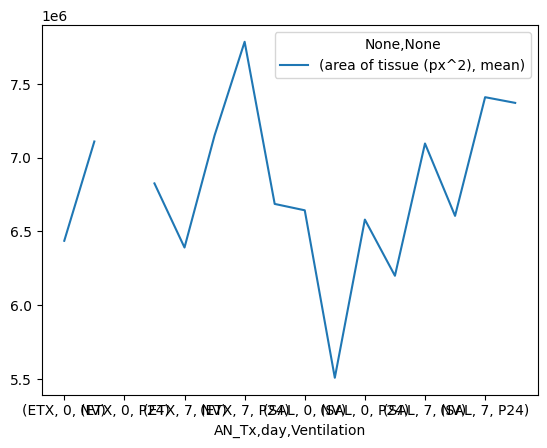

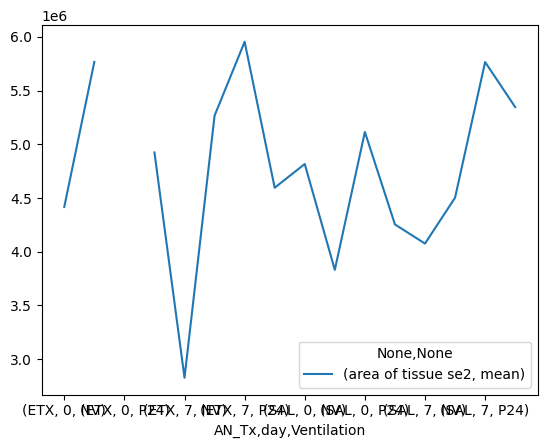

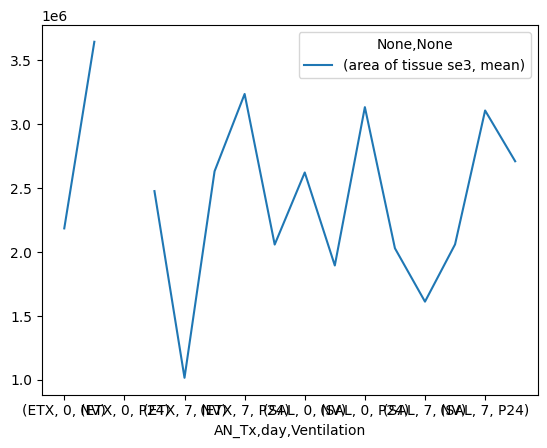

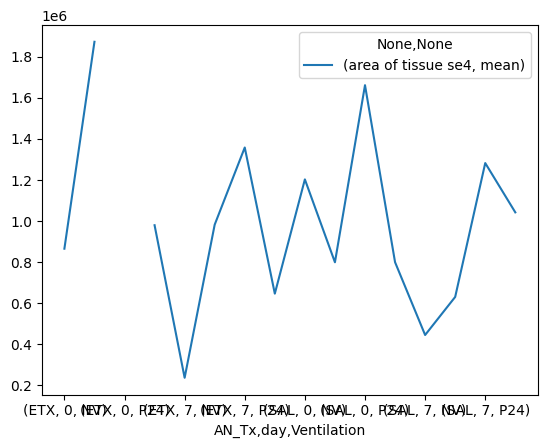

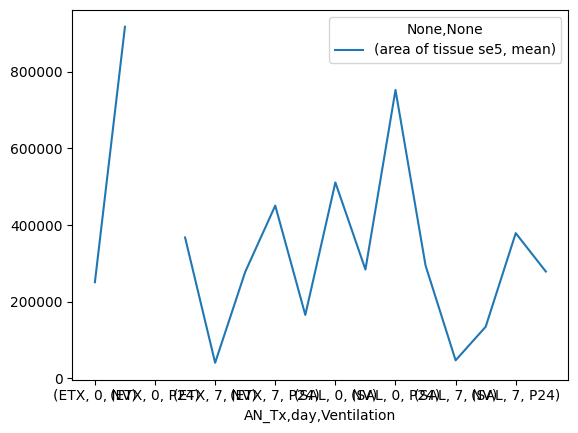

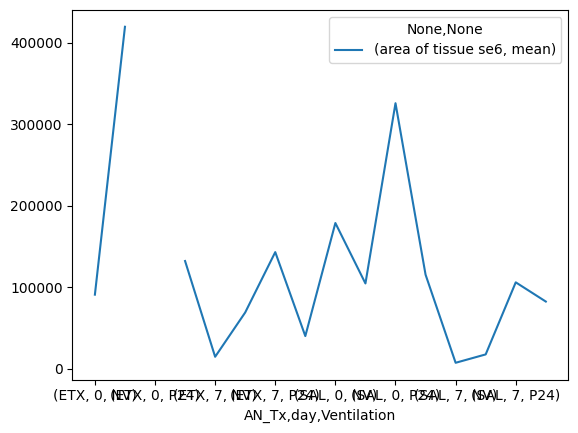

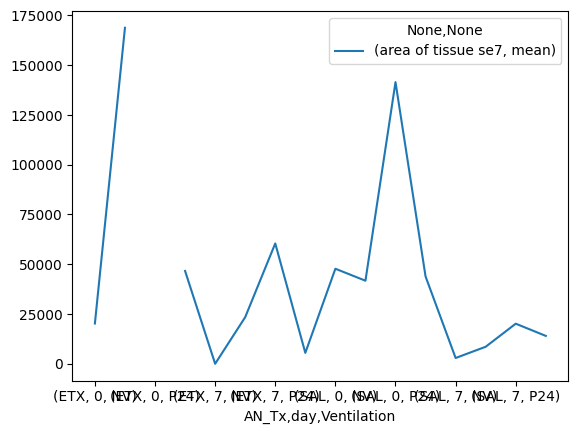

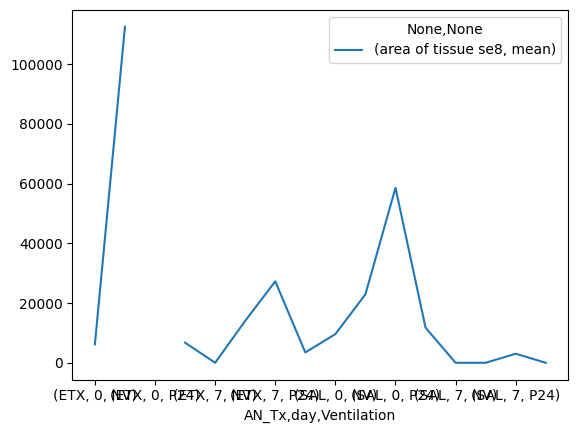

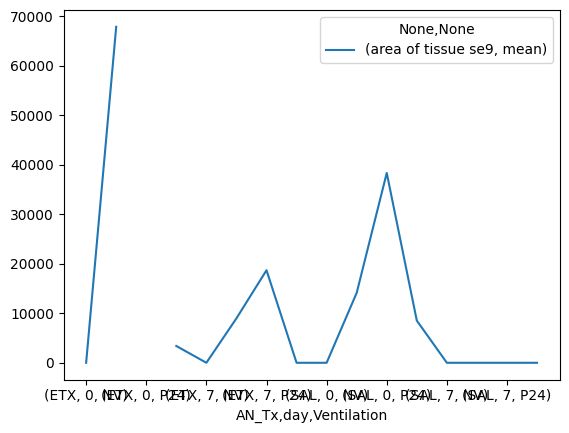

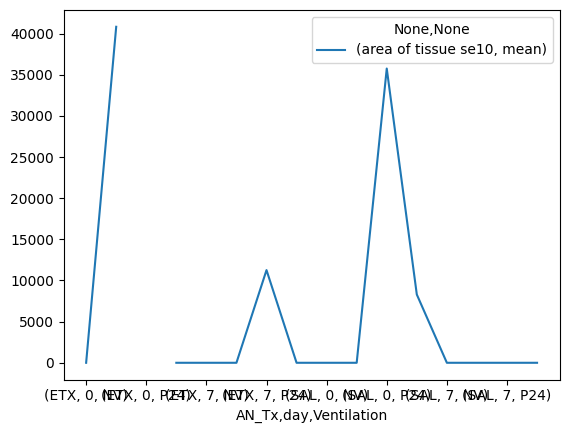

In [14]:
def agg_func(column_name):
    agg_func_math = {
        column_name :
        ['mean'] #, 'median','std'
    }
    return agg_func_math

for se in cols:
    df_grouped = df.groupby(['AN_Tx', 'day','Ventilation']).agg(agg_func(se)).round(2)
    
#     df_daily=df.groupby('date').agg(['sum']).reset_index()
    df_grouped.plot()
    plt.show()

# df.groupby(['AN_Tx', 'day','Ventilation']).agg(agg_func_math).round(2)





In [75]:
df_grouped = df.groupby(['AN_Tx', 'day','Ventilation'])[cols].mean()


df_se_mean_std = df.groupby(['AN_Tx', 'day','Ventilation'])[cols].aggregate(['mean','std'])








                      area of tissue (px^2)               area of tissue se2  \
                                       mean           std               mean   
AN_Tx day Ventilation                                                          
ETX   0   NV                   6.437040e+06  8.732308e+05       4.416574e+06   
          P20                  7.109939e+06  6.067171e+05       5.766364e+06   
          P24                           NaN           NaN                NaN   
          SAFE                 6.825951e+06  8.323010e+05       4.923642e+06   
      7   NV                   6.391411e+06  4.385343e+05       2.826444e+06   
          P20                  7.150904e+06  5.911460e+05       5.265992e+06   
          P24                  7.785629e+06  9.513411e+05       5.953689e+06   
          SAFE                 6.686834e+06  3.743641e+05       4.595411e+06   
SAL   0   NV                   6.643639e+06  1.618425e+06       4.816136e+06   
          P20                  5.508684e

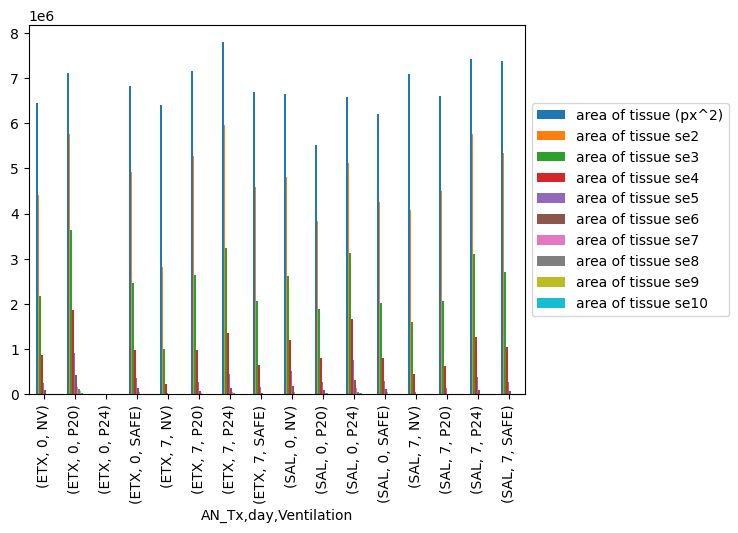

In [35]:
df_grouped.plot( kind = 'bar')
ax = plt.gca()
plt.draw()

ax.tick_params(axis='x', labelrotation = 90)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



[('ETX', 0, 'NV') ('ETX', 0, 'P20') ('ETX', 0, 'P24') ('ETX', 0, 'SAFE')
 ('ETX', 7, 'NV') ('ETX', 7, 'P20') ('ETX', 7, 'P24') ('ETX', 7, 'SAFE')
 ('SAL', 0, 'NV') ('SAL', 0, 'P20') ('SAL', 0, 'P24') ('SAL', 0, 'SAFE')
 ('SAL', 7, 'NV') ('SAL', 7, 'P20') ('SAL', 7, 'P24') ('SAL', 7, 'SAFE')]


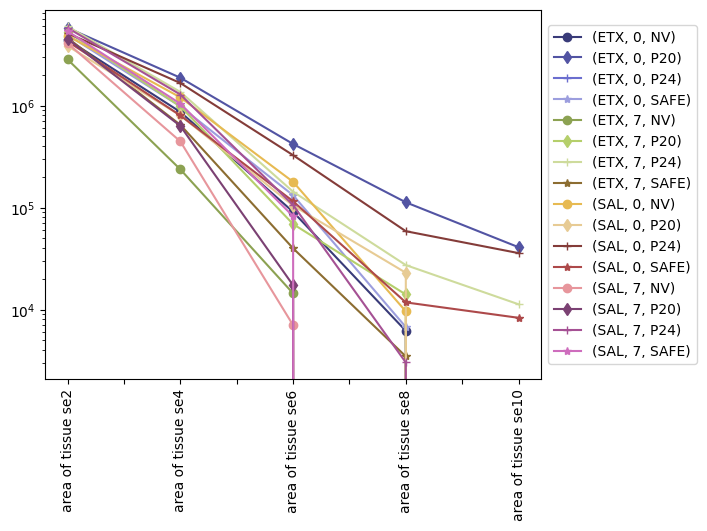

In [119]:


# df_grouped.iloc[:,0:6].transpose().plot(marker = 'o', fontsize = 10)#, xticks = np.array(df_grouped.index.values))
# ax = plt.gca()
# plt.draw()
# ax.tick_params(axis='x', labelrotation = 90)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

cm = plt.get_cmap('tab20b')
# colors=[cm(1.*i/16) for i in range(16)] #gist_rainbow

for j in range(16):
    df_grouped.iloc[j,1:11:2].transpose().plot(marker = markers[j], fontsize = 10,color =cm(1.*j/16),linestyle='-')#, xticks = np.array(df_grouped.index.values))
    ax = plt.gca()

plt.draw()



ax.tick_params(axis='x', labelrotation = 90)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale("log")
print(np.array(df_grouped.index.values))

# index_vals = [list(indx) for k, indx in enumerate(np.array(df_grouped.index.values))]


In [123]:
markers = ['o','d','+','*']*4

SyntaxError: invalid syntax (3595949115.py, line 2)

In [83]:
df_se_mean_std = df.groupby(['AN_Tx', 'day','Ventilation'])[cols].agg([np.mean, np.std])

print(df_se_mean_std)

# df_se_mean_std.plot(kind = "barh", y = "mean",
#           xerr = "std")

                      area of tissue (px^2)               area of tissue se2  \
                                       mean           std               mean   
AN_Tx day Ventilation                                                          
ETX   0   NV                   6.437040e+06  8.732308e+05       4.416574e+06   
          P20                  7.109939e+06  6.067171e+05       5.766364e+06   
          P24                           NaN           NaN                NaN   
          SAFE                 6.825951e+06  8.323010e+05       4.923642e+06   
      7   NV                   6.391411e+06  4.385343e+05       2.826444e+06   
          P20                  7.150904e+06  5.911460e+05       5.265992e+06   
          P24                  7.785629e+06  9.513411e+05       5.953689e+06   
          SAFE                 6.686834e+06  3.743641e+05       4.595411e+06   
SAL   0   NV                   6.643639e+06  1.618425e+06       4.816136e+06   
          P20                  5.508684e

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [98]:
sns.catplot(data=df_se_mean_std, hue = df_se_mean_std.index, kind="box")




ValueError: Cannot use `hue` without `x` and `y`

In [99]:
df_se_mean_std.index


MultiIndex([('ETX', 0,   'NV'),
            ('ETX', 0,  'P20'),
            ('ETX', 0,  'P24'),
            ('ETX', 0, 'SAFE'),
            ('ETX', 7,   'NV'),
            ('ETX', 7,  'P20'),
            ('ETX', 7,  'P24'),
            ('ETX', 7, 'SAFE'),
            ('SAL', 0,   'NV'),
            ('SAL', 0,  'P20'),
            ('SAL', 0,  'P24'),
            ('SAL', 0, 'SAFE'),
            ('SAL', 7,   'NV'),
            ('SAL', 7,  'P20'),
            ('SAL', 7,  'P24'),
            ('SAL', 7, 'SAFE')],
           names=['AN_Tx', 'day', 'Ventilation'])